### 导入库

In [183]:
import numpy as np
import pandas as pd

from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import random
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from pyecharts.globals import CurrentConfig

CurrentConfig.ONLINE_HOST = "https://cdn.kesci.com/lib/pyecharts_assets/"

### 数据读取

In [173]:
data = pd.read_csv('./Balaji Fast Food Sales.csv')
# 随机选10个数据
data.sample(10)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
625,626,02-01-2023,Cold coffee,Beverages,40,15,600,Cash,Mr.,Night
594,595,2/22/2023,Frankie,Fastfood,50,9,450,Online,Mr.,Afternoon
783,784,07-09-2022,Vadapav,Fastfood,20,8,160,Cash,Mrs.,Morning
502,503,11-04-2022,Aalopuri,Fastfood,20,13,260,Cash,Mrs.,Morning
872,873,05-09-2022,Sugarcane juice,Beverages,25,1,25,Online,Mr.,Night
72,73,7/29/2022,Panipuri,Fastfood,20,5,100,Cash,Mr.,Midnight
121,122,4/24/2022,Panipuri,Fastfood,20,3,60,NaN,Mrs.,Night
976,977,01-05-2023,Aalopuri,Fastfood,20,1,20,Cash,Mr.,Evening
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
667,668,05-11-2022,Aalopuri,Fastfood,20,4,80,Online,Mr.,Morning


In [174]:
data.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


### 数据可视化

In [349]:
foodname_name = data.groupby('item_name',as_index=False)['quantity'].sum().sort_values('quantity',ascending=False)
bar_foodname_name = (Bar(init_opts=opts.InitOpts(theme='roma'))
       .add_xaxis(foodname_name['item_name'].to_list())
       .add_yaxis('', foodname_name['quantity'].to_list())
       # 全局设置
       .set_global_opts(
                           yaxis_opts=opts.AxisOpts(name='销量',
                                # y轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False),
                                # y轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14)),
                        
                            xaxis_opts=opts.AxisOpts(name='食物名称',
                                axislabel_opts={"interval":"0"}, # 解决X轴显示不全的问题
                                # x轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14),
                                # x轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False)),
                        # 图例不显示
                            legend_opts=opts.LegendOpts(is_show=False),
                        )
                  .set_global_opts(title_opts=opts.TitleOpts(title="食物类型销售图", 
                                                   pos_top='1%',
                                                    pos_left='40%',
                                                   
                                                  title_textstyle_opts=opts.TextStyleOpts( 
                                                   color='#2BBDBD',
                                                      font_family="cursive",
                                                    font_size=19)
                                                  
                                                  ))

)

In [346]:
foodname_type = data.groupby('item_type',as_index=False)['quantity'].sum().sort_values('quantity',ascending=False)

bar_foodname_type = (Bar(init_opts=opts.InitOpts(theme='roma'))
       .add_xaxis(foodname_type['item_type'].to_list())
       .add_yaxis('', foodname_type['quantity'].to_list())
       # 全局设置
       .set_global_opts(
                           yaxis_opts=opts.AxisOpts(
                                # y轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False),
                                # y轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14)),
                        
                            xaxis_opts=opts.AxisOpts(name='类别',
                                axislabel_opts={"interval":"0"}, # 解决X轴显示不全的问题
                                # x轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14),
                                # x轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False)),
                        # 图例不显示
                            legend_opts=opts.LegendOpts(is_show=False),
       )
    .set_global_opts(title_opts=opts.TitleOpts(title="快餐-饮料销售图", 
                                                   pos_top='22%',
                                                   pos_right='35%',
                                                  title_textstyle_opts=opts.TextStyleOpts( 
                                                   color='#4BA0EB',
                                                      font_family="cursive",
                                                    font_size=19)
                                                  
                                                  ))
)


结合时间段分析不同时间段顾客的消费偏好

In [341]:
time_of_sale_quantity = data.groupby('time_of_sale',as_index=False)['quantity'].sum().sort_values('quantity',ascending=False)

bar_time_of_sale_quantity = (Bar(init_opts=opts.InitOpts(theme='roma'))
       .add_xaxis(time_of_sale_quantity['time_of_sale'].to_list())
       .add_yaxis('', time_of_sale_quantity['quantity'].to_list())
       # 全局设置
       .set_global_opts(
                           yaxis_opts=opts.AxisOpts(
                                # y轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False),
                                # y轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14)),
                        
                            xaxis_opts=opts.AxisOpts(name='类别',
                                axislabel_opts={"interval":"0"}, # 解决X轴显示不全的问题
                                # x轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14),
                                # x轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False)),
                        # 图例不显示
                            legend_opts=opts.LegendOpts(is_show=False),
           
                        )
        .set_global_opts(title_opts=opts.TitleOpts(title="时间-食物销售量", 
                                                   pos_top='22%',
                                                  title_textstyle_opts=opts.TextStyleOpts( 
                                                   color='#A68DD6',
                                                      font_family="cursive",
                                                    font_size=19)
                                                  
                                                  ))
)

In [335]:
time_of_sale_type = data.groupby(['time_of_sale','item_type']).sum()

list_time_of_sale = ['Afternoon','Evening','Midnight','Morning','Night']
y1_data=[]
y2_data = []
for i in list_time_of_sale :
    y1 = time_of_sale_type.loc[(i,'Beverages'),'quantity']
    y1_data.append(int(y1))
for i in list_time_of_sale :
    y2 = time_of_sale_type.loc[(i,'Fastfood'),'quantity']
    y2_data.append(int(y2))
# 将列表里的值转化为int，解决数值为'numpy.int64'，不显示图的问题

bar_time_of_sale_type = (
    Bar()
       .add_xaxis(list_time_of_sale)
       .add_yaxis('Beverages', y1_data)
       .add_yaxis('Fastfood', y2_data)
     .set_global_opts(
                           yaxis_opts=opts.AxisOpts(name='销量',
                                # y轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False),
                                # y轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14)),
                        
                            xaxis_opts=opts.AxisOpts(name='时间',
                                axislabel_opts={"interval":"0"}, # 解决X轴显示不全的问题
                                # x轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14),
                                # x轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False)),
       )
        .set_global_opts(title_opts=opts.TitleOpts(title="时间-快餐饮料销售图", 
                                                   pos_top='43%',
                                                   pos_left='35%',
                                                   
                                                  title_textstyle_opts=opts.TextStyleOpts( 
                                                   color='#FEC07A',
                                                      font_family="cursive",
                                                    font_size=19)
                                                  
                                                  ),
                        legend_opts=opts.LegendOpts(is_show=True,
                                                pos_top='45%',
                                                   pos_left='35%',))
      )

In [336]:
received_by_quantity = data.groupby('received_by',as_index=False)['quantity'].sum().sort_values('quantity',ascending=False)

bar_received_by_quantity = (Bar(init_opts=opts.InitOpts(theme='roma'))
       .add_xaxis(received_by_quantity['received_by'].to_list())
       .add_yaxis('', received_by_quantity['quantity'].to_list())
       # 全局设置
       .set_global_opts(
                           yaxis_opts=opts.AxisOpts(name='订单量',
                                # y轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False),
                                # y轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14)),
                        
                            xaxis_opts=opts.AxisOpts(name='性别',
                                axislabel_opts={"interval":"0"}, # 解决X轴显示不全的问题
                                # x轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14),
                                # x轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False)),
                        # 图例不显示
                            legend_opts=opts.LegendOpts(is_show=False),
           
                        )
        .set_global_opts(title_opts=opts.TitleOpts(title="性别-订单量", 
                                                   pos_top='63%',
                                                    pos_left='20%',
                                                  title_textstyle_opts=opts.TextStyleOpts( 
                                                   color='#8995B7',
                                                      font_family="cursive",
                                                    font_size=19)
                                                  
                                                  ))
       
)

In [337]:
transaction_type_transaction_amount = data.groupby('transaction_type',as_index=False)['transaction_amount'].sum().sort_values('transaction_amount',ascending=False)

bar_transaction_type_transaction_amount = (Bar(init_opts=opts.InitOpts(theme='roma'))
       .add_xaxis(transaction_type_transaction_amount['transaction_type'].to_list())
       .add_yaxis('', transaction_type_transaction_amount['transaction_amount'].to_list())
       # 全局设置
       .set_global_opts(
                           yaxis_opts=opts.AxisOpts(name='销售额',
                                # y轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False),
                                # y轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14)),
                        
                            xaxis_opts=opts.AxisOpts(name='线上线下',
                                axislabel_opts={"interval":"0"}, # 解决X轴显示不全的问题
                                # x轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14),
                                # x轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False)),
                        # 图例不显示
                            legend_opts=opts.LegendOpts(is_show=False),
           
                        )
        .set_global_opts(title_opts=opts.TitleOpts(title="线上/下-销售额", 
                                                   pos_top='63%',
                                                   pos_left='65%',
                                                  title_textstyle_opts=opts.TextStyleOpts( 
                                                   color='#DEC70F',
                                                      font_family="cursive",
                                                    font_size=19)
                                                  
                                                  ))
   
)
# 线上线下销售额

In [338]:
item_name_transaction_amount = data.groupby('item_name',as_index=False)['transaction_amount'].sum().sort_values('transaction_amount',ascending=False)

bar_item_name_transaction_amount = (Bar(init_opts=opts.InitOpts(theme='roma'))
       .add_xaxis(item_name_transaction_amount['item_name'].to_list())
       .add_yaxis('', item_name_transaction_amount['transaction_amount'].to_list())
       # 全局设置
       .set_global_opts(
                           yaxis_opts=opts.AxisOpts(name='销售额',
                                # y轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False),
                                # y轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14)),
                        
                            xaxis_opts=opts.AxisOpts(name='食物',
                                axislabel_opts={"interval":"0"}, # 解决X轴显示不全的问题
                                # x轴标签文字大小
                                name_textstyle_opts=opts.TextStyleOpts(font_size=14),
                                # x轴 网格线不显示
                                splitline_opts=opts.SplitLineOpts(is_show=False)),
                        # 图例不显示
                            legend_opts=opts.LegendOpts(is_show=False),
           
                        )
        .set_global_opts(title_opts=opts.TitleOpts(title="食物-销售额", 
                                                   pos_top='80%',
                                                   pos_left='45%',
                                                  title_textstyle_opts=opts.TextStyleOpts( 
                                                   color='#97BE48',
                                                      font_family="cursive",
                                                    font_size=19)
                                                  
                                                  ))
    
)


In [355]:
grid = Grid(
    init_opts=opts.InitOpts(
        theme='macarons',
        width='1000px',
        height='1750px')
)
grid.add(
    bar_foodname_name,
    is_control_axis_index=False,
    grid_opts=opts.GridOpts(
        pos_top='5%',   # 指定Grid中子图的位置
        pos_bottom='80%',
        pos_left='5%',
        pos_right='10%'
    )
)

grid.add(
    bar_time_of_sale_quantity,
    is_control_axis_index=False,
    grid_opts=opts.GridOpts(
        pos_top='25%',   # 指定Grid中子图的位置
        pos_bottom='60%',
        pos_left='5%',
        pos_right='55%'
    )
)
grid.add(
    bar_foodname_type,
    is_control_axis_index=False,
    grid_opts=opts.GridOpts(
        pos_top='25%',   # 指定Grid中子图的位置
        pos_bottom='60%',
        pos_left='55%',
        pos_right='10%'
    )
)

grid.add(
    bar_time_of_sale_type,
    is_control_axis_index=False,
    grid_opts=opts.GridOpts(
        pos_top='45%',   # 指定Grid中子图的位置
        pos_bottom='40%',
        pos_left='5%',
        pos_right='10%'
    )
)
grid.add(
    bar_received_by_quantity,
    is_control_axis_index=False,
    grid_opts=opts.GridOpts(
        pos_top='65%',   # 指定Grid中子图的位置
        pos_bottom='24%',
        pos_left='5%',
        pos_right='55%'
    )
)
grid.add(
    bar_transaction_type_transaction_amount,
    is_control_axis_index=False,
    grid_opts=opts.GridOpts(
        pos_top='65%',   # 指定Grid中子图的位置
        pos_bottom='24%',
        pos_left='55%',
        pos_right='10%'
    )
)
grid.add(
    bar_item_name_transaction_amount,
    is_control_axis_index=False,
    grid_opts=opts.GridOpts(
        pos_top='80%',   # 指定Grid中子图的位置
        pos_bottom='5%',
        pos_left='5%',
        pos_right='8%'
    )
)
grid.render_notebook()

    综上由图可知，餐厅销量最高的是Cold Coffee 1361杯，其次是Sugarcane juice	1278杯、Panipuri	1226份、Frankie 1150份、Sandwich 1097份、Aalopuri	1044份、Vadapav 1006，但在总销售量中，Fastfood快餐食品销售量有5523份超过饮料的2639份。
    Night和Afternoon时间段的销量相对较高，其次是Midnight、Morning、Evening。其中在Afternoon时间段对Beverages饮料的需求量最大，达到了662杯；在Night和Midnight时间段对快餐的需求量增大。
    故此，应在Afternoon时间段增加对Beverages的制作供应，以及在Night和Midnight时间段增大对快餐的供给。

### 时间序列分析-预测

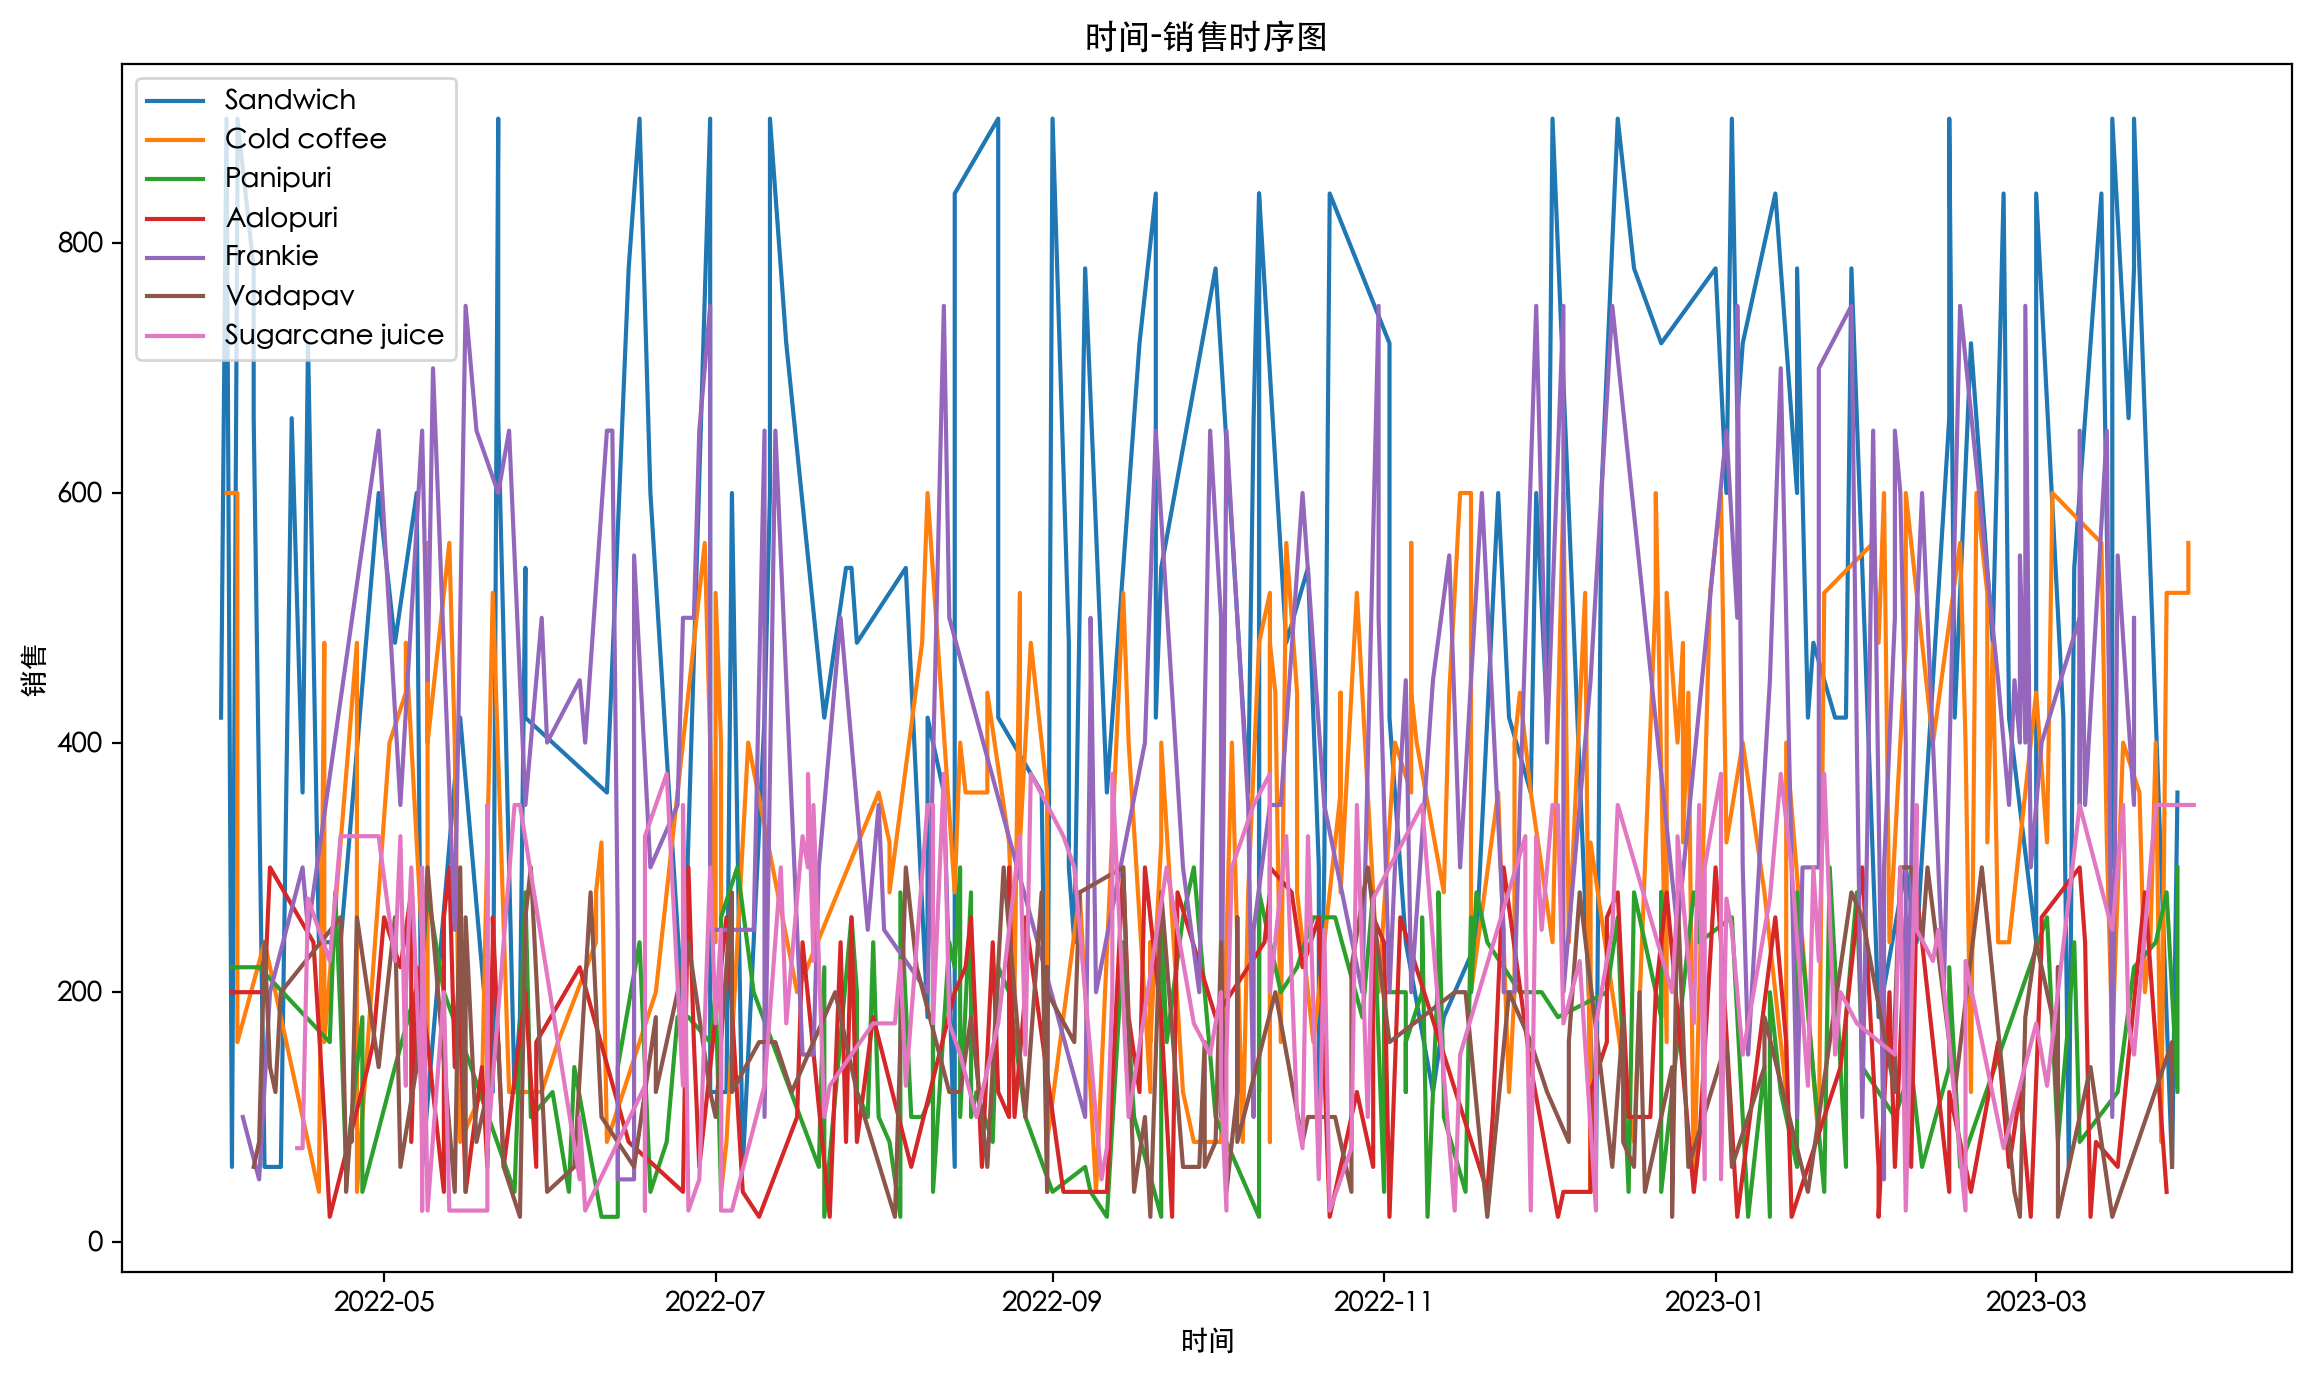

In [197]:
import matplotlib
matplotlib.rc("font", family='Heiti TC')

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values('date')

plt.figure(figsize=(14, 8),dpi = 200)
items = data['item_name'].unique()
for item in items:
    item_data = data[data['item_name'] == item]
    plt.plot(item_data['date'], item_data['transaction_amount'], label=item)

plt.title('时间-销售时序图')
plt.xlabel('时间')
plt.ylabel('销售')
plt.legend()
plt.show()

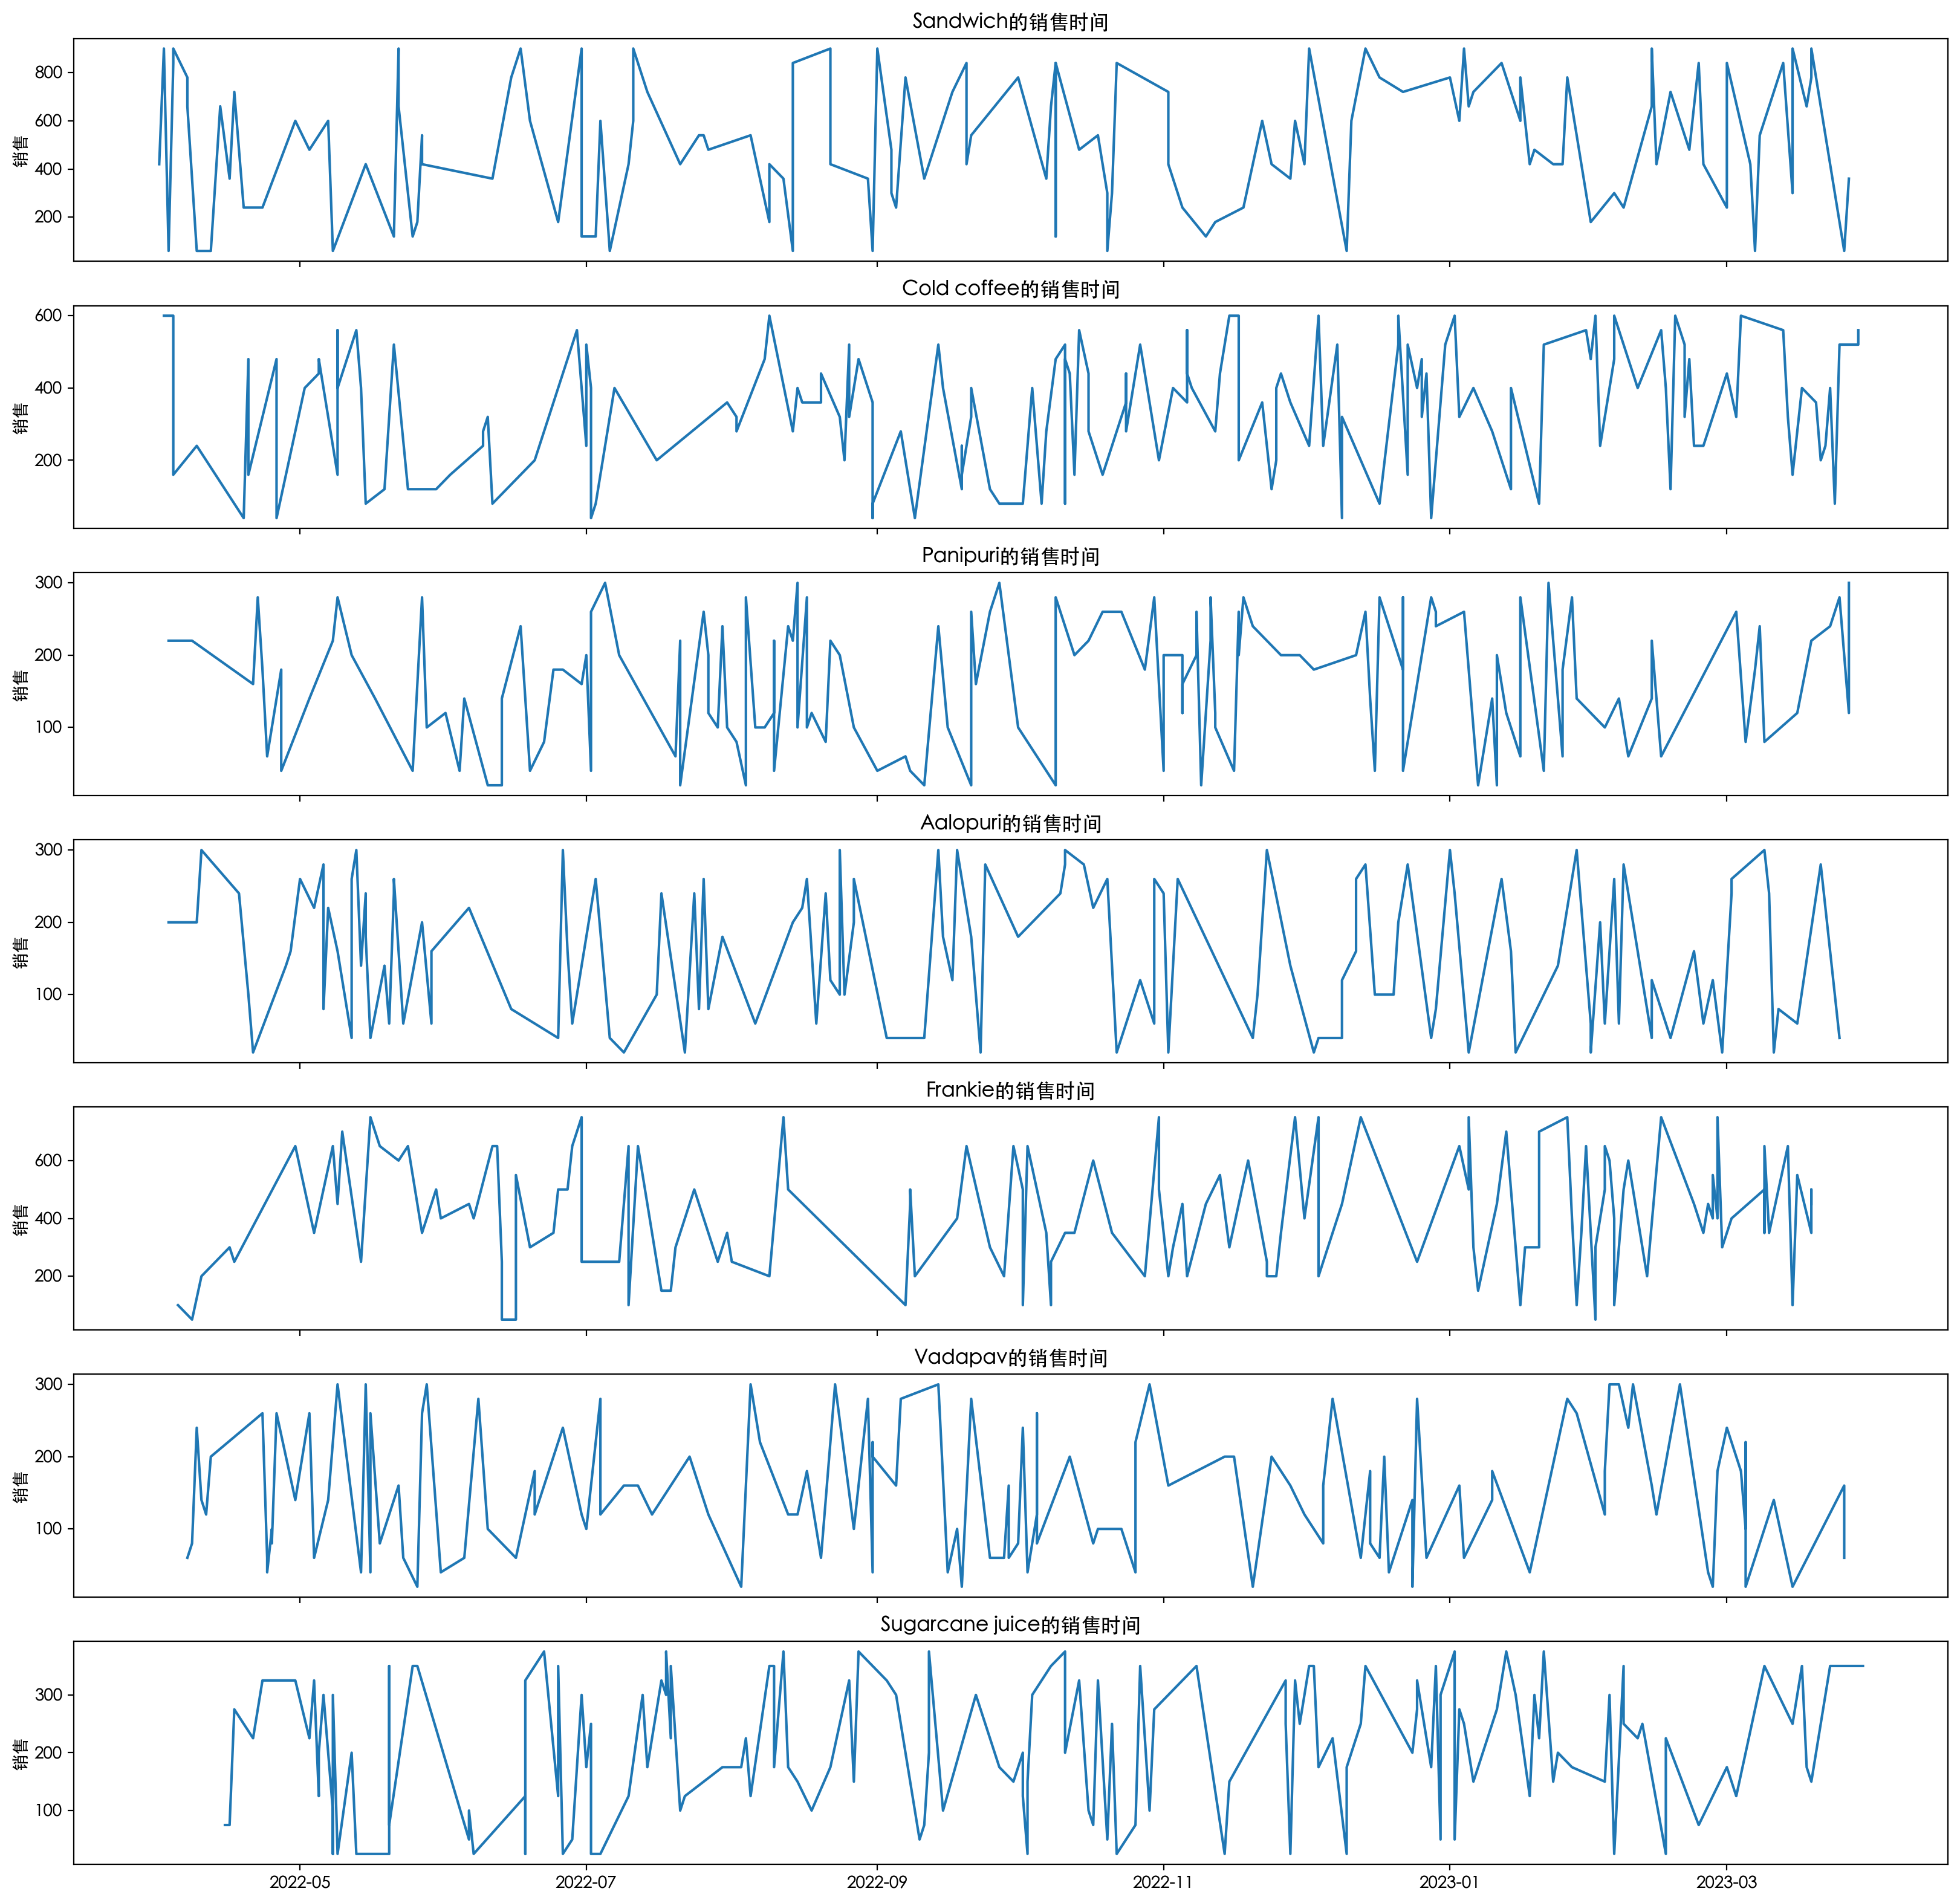

<Figure size 2800x1600 with 0 Axes>

In [216]:
fig, axes = plt.subplots(len(items), 1, figsize=(20, 20), sharex=True,dpi=200)
for i, item in enumerate(items):
    item_data = data[data['item_name'] == item]
    axes[i].plot(item_data['date'], item_data['transaction_amount'])
    axes[i].set_title('{}的销售时间'.format(item)) 
    axes[i].set_ylabel('销售')
plt.figure(figsize=(14, 8),dpi = 200)
plt.tight_layout()


plt.show()

In [217]:
statistics = data.describe()

total_sales_by_type = data.groupby('item_type')['transaction_amount'].sum()

most_sold_items = data.sort_values(by='quantity', ascending=False).head(5)

most_expensive_items = data.sort_values(by='item_price', ascending=False).head(5)

monthly_sales = data.set_index('date').resample('M')['transaction_amount'].sum()

print("1. 统计描述:")
print(statistics)
print("\n2. 总销售额:")
print(total_sales_by_type)
print("\n3. 最多订购数量销售:")
print(most_sold_items)
print("\n4. 最多销售金额:")
print(most_expensive_items)
print("\n5. 预测月销售:")
print(monthly_sales)


1. 统计描述:
          order_id   item_price     quantity  transaction_amount
count  1000.000000  1000.000000  1000.000000         1000.000000
mean    500.500000    33.315000     8.162000          275.230000
std     288.819436    14.921744     4.413075          204.402979
min       1.000000    20.000000     1.000000           20.000000
25%     250.750000    20.000000     4.000000          120.000000
50%     500.500000    25.000000     8.000000          240.000000
75%     750.250000    50.000000    12.000000          360.000000
max    1000.000000    60.000000    15.000000          900.000000

2. 总销售额:
item_type
Beverages     86390
Fastfood     188840
Name: transaction_amount, dtype: int64

3. 最多订购数量销售:
     order_id       date        item_name  item_type  item_price  quantity  \
395       396 2022-10-31          Frankie   Fastfood          50        15   
669       670 2022-07-05         Panipuri   Fastfood          20        15   
932       933 2023-01-21  Sugarcane juice  Beverages       

预测结果:2022-04-30    17670

2022-05-31    26570

2022-06-30    17335

2022-07-31    19490

2022-08-31    22305

2022-09-30    18640

2022-10-31    27205

2022-11-30    22900

2022-12-31    23460

2023-01-31    28670

2023-02-28    25595

2023-03-31    25390